In [30]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from gensim import models
from gensim.models import Word2Vec
model = Word2Vec.load("model_1000.bin")

In [5]:
df = pd.read_pickle(r'D:/git/coursAlice/corpus1000_5themes_cleaned.pickle')

In [34]:
# df

In [7]:
df.label.unique()

array(['economie', 'societe', 'sport', 'politique', 'culture'],
      dtype=object)

In [8]:
def document_vector(text):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    doc = [word for word in text if word in model.wv.vocab]
    vector = np.mean(model[doc], axis=0)
    return vector

In [9]:
df = df[df.label.isin(['societe','politique'])]

In [10]:
df.label.unique()

array(['societe', 'politique'], dtype=object)

In [14]:
df['tokens'] = df['text_clean'].apply(lambda x:
                              x.replace("||",' ').replace("|"," ").split(" "))
df

C:\Users\nakhl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,label,text,text_clean,tokens,doc_vectors
1000,societe,"La France comptait près de 66,2 millions d’hab...","la france|compter|66,2|habitant|début||vivre|f...","[la, france, compter, 66,2, habitant, début, v...","[0.07698034, 0.19601221, 0.09040069, -0.082675..."
1001,societe,Le déficit de la Sécurité sociale s'est élevé ...,"déficit|sécurité sociale|élevé|9,5|euro||défic...","[déficit, sécurité, sociale, élevé, 9,5, euro,...","[0.07490713, 0.16280088, 0.084937215, -0.07103..."
1002,societe,"L'amertume de David Sénat, ex-serviteur de l'E...",amertume|david sénat|ex-serviteur|etat|placard...,"[amertume, david, sénat, ex-serviteur, etat, p...","[0.074706465, 0.14759947, 0.082480066, -0.0657..."
1003,societe,Trois jours de grève générales et des barricad...,jour|grève|général|barricade|guadeloupe||guade...,"[jour, grève, général, barricade, guadeloupe, ...","[0.07229083, 0.16124104, 0.08284776, -0.070061..."
1004,societe,s de prison avec sursis requis contre une mère...,prison|sursir|requérir|mère|accuser|tuer|fils|...,"[prison, sursir, requérir, mère, accuser, tuer...","[0.07308335, 0.14774059, 0.08113603, -0.065254..."
...,...,...,...,...,...
3995,politique,"François Bayrou, l’implacable procureur de Nic...",françois bayrou|lir|implacable|procureur|nicol...,"[françois, bayrou, lir, implacable, procureur,...","[0.07117493, 0.14257848, 0.07890208, -0.063185..."
3996,politique,François Hollande plaide en faveur de nouveaux...,françois hollande|plaide|faveur|instrument|fin...,"[françois, hollande, plaide, faveur, instrumen...","[0.07634918, 0.18792452, 0.0894091, -0.0799101..."
3997,politique,"D'après le ""Canard enchaîné"", Georges Tron lou...",canard enchaîné|georges tron|louer|appartement...,"[canard, enchaîné, georges, tron, louer, appar...","[0.07225843, 0.17905095, 0.08516515, -0.075785..."
3998,politique,La sortie réussie de Nicolas Sarkozy\n\nEn le ...,sortie|réussir|nicolas sarkozy||regarder|faire...,"[sortie, réussir, nicolas, sarkozy, regarder, ...","[0.07029109, 0.17014603, 0.081875265, -0.07235..."


In [15]:
df['doc_vectors'] = df['tokens'].apply(lambda x:
                                      document_vector(x))
df

C:\Users\nakhl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
C:\Users\nakhl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,label,text,text_clean,tokens,doc_vectors
1000,societe,"La France comptait près de 66,2 millions d’hab...","la france|compter|66,2|habitant|début||vivre|f...","[la, france, compter, 66,2, habitant, début, v...","[0.36056656, 0.3072927, 0.29033914, -0.2041989..."
1001,societe,Le déficit de la Sécurité sociale s'est élevé ...,"déficit|sécurité sociale|élevé|9,5|euro||défic...","[déficit, sécurité, sociale, élevé, 9,5, euro,...","[0.36934826, 0.20955004, 0.373278, -0.33665618..."
1002,societe,"L'amertume de David Sénat, ex-serviteur de l'E...",amertume|david sénat|ex-serviteur|etat|placard...,"[amertume, david, sénat, ex-serviteur, etat, p...","[0.3184783, 0.25930622, 0.3053162, -0.13199869..."
1003,societe,Trois jours de grève générales et des barricad...,jour|grève|général|barricade|guadeloupe||guade...,"[jour, grève, général, barricade, guadeloupe, ...","[0.26895145, 0.25703964, 0.25247607, -0.127552..."
1004,societe,s de prison avec sursis requis contre une mère...,prison|sursir|requérir|mère|accuser|tuer|fils|...,"[prison, sursir, requérir, mère, accuser, tuer...","[0.3197554, 0.2957367, 0.32517418, -0.18429999..."
...,...,...,...,...,...
3995,politique,"François Bayrou, l’implacable procureur de Nic...",françois bayrou|lir|implacable|procureur|nicol...,"[françois, bayrou, lir, implacable, procureur,...","[0.30622804, 0.2936117, 0.25705153, -0.0998508..."
3996,politique,François Hollande plaide en faveur de nouveaux...,françois hollande|plaide|faveur|instrument|fin...,"[françois, hollande, plaide, faveur, instrumen...","[0.38619262, 0.25046214, 0.38973385, -0.213732..."
3997,politique,"D'après le ""Canard enchaîné"", Georges Tron lou...",canard enchaîné|georges tron|louer|appartement...,"[canard, enchaîné, georges, tron, louer, appar...","[0.32719833, 0.23355244, 0.32272238, -0.243378..."
3998,politique,La sortie réussie de Nicolas Sarkozy\n\nEn le ...,sortie|réussir|nicolas sarkozy||regarder|faire...,"[sortie, réussir, nicolas, sarkozy, regarder, ...","[0.34956318, 0.24198176, 0.3781963, -0.1512278..."


In [16]:
df_train, df_test = model_selection.train_test_split(df, test_size=0.3)
y_train = df_train["label"].values
y_test = df_test["label"].values #X_train, X_test, y_train, y_test

In [17]:
df_train['doc_vector'] = df_train.tokens.apply(document_vector)
df_test['doc_vector'] = df_test.tokens.apply(document_vector)

C:\Users\nakhl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
C:\Users\nakhl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\nakhl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
X_train = df_train['doc_vector'].tolist()
X_test = df_test['doc_vector'].tolist()

### LogisticRegression

In [19]:
logreg = LogisticRegression().fit(X_train, y_train)
y_pred=logreg.predict(X_test)

In [20]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) # les vrais labels du test et les prédits
cnf_matrix

array([[195, 108],
       [103, 194]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

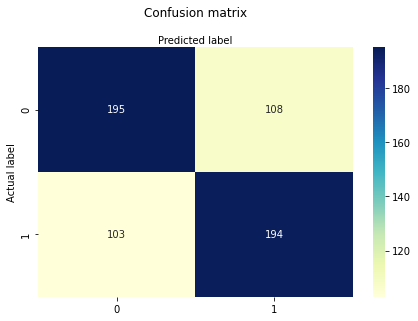

In [21]:
class_names=['societe','politique'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
print('Class société---')
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label="societe"))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label="societe"))
print("F-measure",metrics.f1_score(y_test, y_pred, pos_label="societe"))
print('Class politique---')
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label="politique"))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label="politique"))
print("F-measure",metrics.f1_score(y_test, y_pred, pos_label="politique"))

Class société---
Precision: 0.6423841059602649
Recall: 0.6531986531986532
F-measure 0.647746243739566
Class politique---
Precision: 0.6543624161073825
Recall: 0.6435643564356436
F-measure 0.64891846921797


### SVM

In [23]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

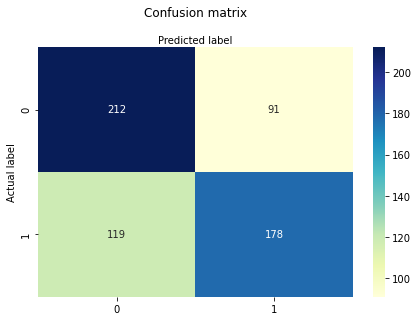

In [24]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=['societe','politique'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
print('Class société----')
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label="societe"))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label="societe"))
print("F-measure",metrics.f1_score(y_test, y_pred, pos_label="societe"))
print('Class politique----')
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label="politique"))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label="politique"))
print("F-measure",metrics.f1_score(y_test, y_pred, pos_label="politique"))

Class société----
Precision: 0.6617100371747212
Recall: 0.5993265993265994
F-measure 0.6289752650176679
Class politique----
Precision: 0.6404833836858006
Recall: 0.6996699669966997
F-measure 0.668769716088328


### RandomForestClassifier

In [26]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[196, 107],
       [110, 187]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

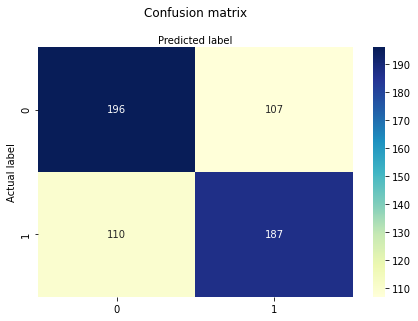

In [27]:
class_names=['societe','politique'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
print('Class société----')
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label="societe"))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label="societe"))
print("F-measure",metrics.f1_score(y_test, y_pred, pos_label="societe"))
print('Class politique----')
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label="politique"))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label="politique"))
print("F-measure",metrics.f1_score(y_test, y_pred, pos_label="politique"))

Class société----
Precision: 0.6360544217687075
Recall: 0.6296296296296297
F-measure 0.6328257191201354
Class politique----
Precision: 0.6405228758169934
Recall: 0.6468646864686468
F-measure 0.6436781609195402


### MLPClassifier

In [31]:
clf = MLPClassifier(random_state=1)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[194, 109],
       [105, 192]], dtype=int64)

In [32]:
print("Precision:",metrics.precision_score(y_test, y_pred, average=None))
print("Recall:",metrics.recall_score(y_test, y_pred, average=None))
print("F-measure",metrics.f1_score(y_test, y_pred, average=None))

Precision: [0.64882943 0.63787375]
Recall: [0.64026403 0.64646465]
F-measure [0.64451827 0.64214047]


Text(0.5, 257.44, 'Predicted label')

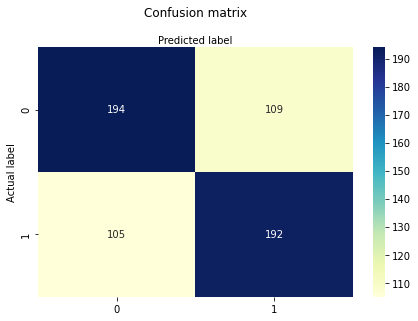

In [33]:
class_names=['societe','politique'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')